In [1]:
# Ha = Citi Bike users under the age of 35 bike for longer durations compared to the average users
# H0 = Citi Bike users under the age of 35 bike either for shorter or the same durantions compared to the average users

# Ha = Trip duration (under age 35) > Trip duration (general pop)
# H0 = Trip duration (under age 35) <= Trip duration (general pop)

In [5]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json

Populating the interactive namespace from numpy and matplotlib


In [3]:
os.getenv('PUI2016')

'/home/cusp/nm2565/PUI2016'

In [4]:
os.getenv('PUIDATA')

'/home/cusp/nm2565/PUIdata'

In [6]:
!curl -O 'https://s3.amazonaws.com/tripdata/201512-citibike-tripdata.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22.0M  100 22.0M    0     0  20.7M      0  0:00:01  0:00:01 --:--:-- 24.3M


In [7]:
!unzip 201512-citibike-tripdata.zip

Archive:  201512-citibike-tripdata.zip
  inflating: 201512-citibike-tripdata.csv  


In [15]:
citibike = pd.read_csv('201512-citibike-tripdata.csv')
citibike.head

<bound method DataFrame.head of         tripduration            starttime             stoptime  \
0                475   12/1/2015 07:35:36   12/1/2015 07:43:32   
1                684   12/1/2015 07:38:15   12/1/2015 07:49:39   
2               1063   12/1/2015 07:44:49   12/1/2015 08:02:33   
3               1075   12/1/2015 08:02:29   12/1/2015 08:20:24   
4                293   12/1/2015 08:06:37   12/1/2015 08:11:30   
5                812   12/1/2015 08:07:57   12/1/2015 08:21:30   
6                551   12/1/2015 08:08:53   12/1/2015 08:18:05   
7               1531   12/1/2015 08:12:10   12/1/2015 08:37:42   
8               1617   12/1/2015 08:26:17   12/1/2015 08:53:14   
9                525   12/1/2015 08:28:37   12/1/2015 08:37:23   
10               721   12/1/2015 08:43:25   12/1/2015 08:55:27   
11               770   12/1/2015 08:47:46   12/1/2015 09:00:37   
12               606   12/1/2015 08:47:52   12/1/2015 08:57:59   
13               773   12/1/2015 08:48:09   

In [16]:
citibike.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [18]:
citibike.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'usertype', 'gender'], axis = 1, inplace = True)

[1930, 2015, 0, 120000]

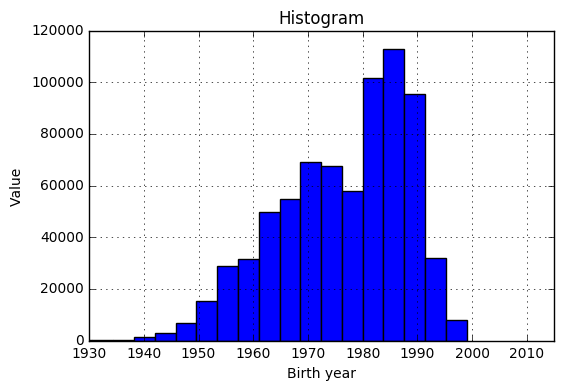

In [66]:
a = citibike['birth year'].hist(bins = 30)
a.set_title("Histogram")
a.set_xlabel("Birth year")
a.set_ylabel("Value")
plt.axis([1930,2015,0,120000]) #Not takingn into account the outliers here 
#a.axis(0,10000,0,900000)

In [24]:
citibike.head()

tripduration  birth year
0           475      1983.0
1           684      1975.0
2          1063      1966.0
3          1075      1985.0
4           293      1968.0

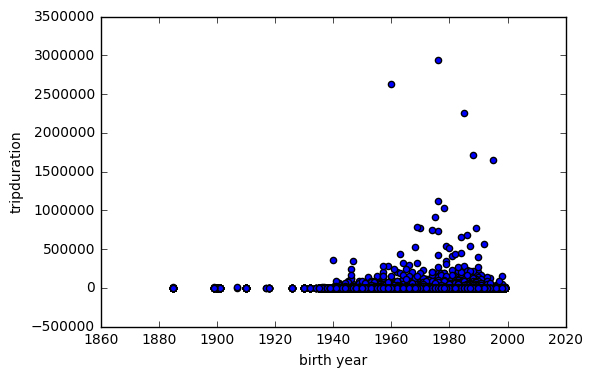

In [65]:
citibike.plot(x = 'birth year', y = 'tripduration', kind = 'scatter')
#plt.axis([1930,2015,0,3500000]) #axis allows you to work on rows and columns

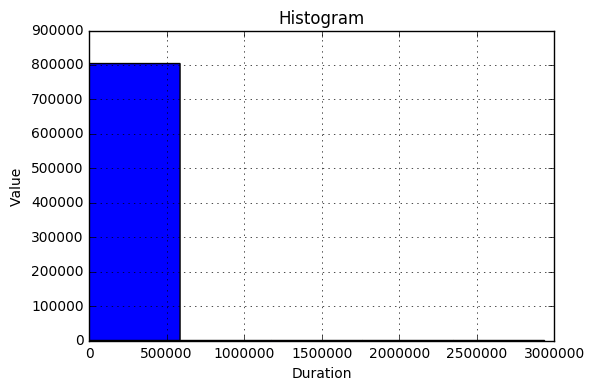

In [54]:
b = citibike['tripduration'].hist(bins = 5)
b.set_title("Histogram")
b.set_xlabel("Duration")
b.set_ylabel("Value")